In [25]:
import pandas as pd
import re
import numpy as np
import nltk

In [26]:
news= pd.read_csv("C:/Users/HP/Downloads/fake_or_real_news.csv")

In [27]:
news.head(10)

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [28]:
labels=news['label']
labels.head(5)

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(news['text'], labels, test_size=0.2, random_state=7)

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv=TfidfVectorizer()
tv_train=tv.fit_transform(x_train).toarray()
tv_test=tv.fit_transform(x_test).toarray()

In [31]:
tv_train

array([[0.        , 0.02344922, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.07535569, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00901538, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
news_mnb = Pipeline([('tv',TfidfVectorizer()),('mnb',MultinomialNB())])
news_mnb.fit(x_train,y_train)

Pipeline(steps=[('tv', TfidfVectorizer()), ('mnb', MultinomialNB())])

In [33]:
y_pred=news_mnb.predict(x_test)
y_pred_train=news_mnb.predict(x_train)
y_pred

array(['REAL', 'FAKE', 'REAL', ..., 'REAL', 'REAL', 'REAL'], dtype='<U4')

In [34]:
news_mnb.score(x_train,y_train)

0.8628650355169692

In [35]:
news_mnb.score(x_test,y_test)

0.8161010260457774

In [36]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

        FAKE       0.99      0.73      0.84      2526
        REAL       0.79      1.00      0.88      2542

    accuracy                           0.86      5068
   macro avg       0.89      0.86      0.86      5068
weighted avg       0.89      0.86      0.86      5068



In [37]:
print(accuracy_score(y_test,y_pred))

0.8161010260457774


Training Accuracy: 0.8628650355169692
Test Accuracy: 0.8161010260457774

Classification Report on Training Data:
              precision    recall  f1-score   support

        FAKE       0.99      0.73      0.84      2526
        REAL       0.79      1.00      0.88      2542

    accuracy                           0.86      5068
   macro avg       0.89      0.86      0.86      5068
weighted avg       0.89      0.86      0.86      5068


Test Accuracy:
0.8161010260457774


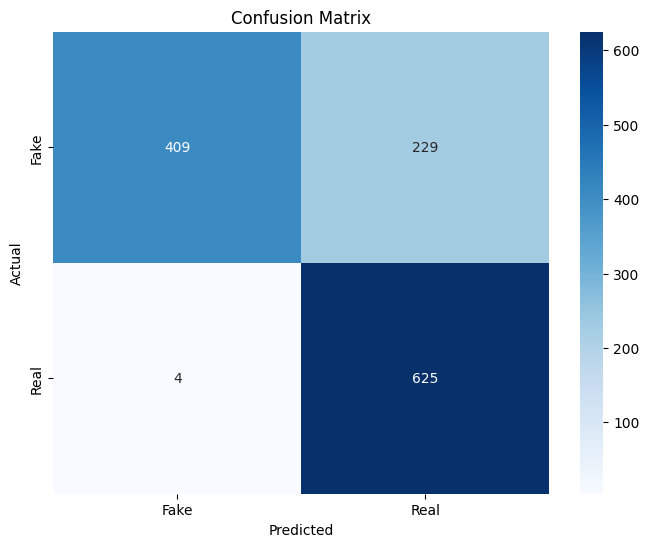

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
news = pd.read_csv("C:/Users/HP/Downloads/fake_or_real_news.csv")
labels = news['label']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(news['text'], labels, test_size=0.2, random_state=7)

# Create a pipeline for TF-IDF vectorization and Multinomial Naive Bayes classifier
news_mnb = Pipeline([('tv', TfidfVectorizer()), ('mnb', MultinomialNB())])

# Fit the pipeline on the training data
news_mnb.fit(x_train, y_train)

# Predict on the test data
y_pred = news_mnb.predict(x_test)

# Predict on the training data (for evaluation)
y_pred_train = news_mnb.predict(x_train)

# Print classification report and accuracy scores
print("Training Accuracy:", news_mnb.score(x_train, y_train))
print("Test Accuracy:", news_mnb.score(x_test, y_test))
print("\nClassification Report on Training Data:")
print(classification_report(y_train, y_pred_train))
print("\nTest Accuracy:")
print(accuracy_score(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
